In [2]:
#@title Default title text
import torch
import torchvision
import torchvision.transforms as transforms


In [4]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='F:\PARALLEL COMPUTING\BTL\CNN_Pytorch', 
                                        train=True,
                                        download=True, 
                                        transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, 
                                          batch_size=4,
                                          shuffle=True)

testset = torchvision.datasets.CIFAR10(root='F:\PARALLEL COMPUTING\BTL\CNN_Pytorch', 
                                       train=False,
                                       download=True, 
                                       transform=transform)
testloader = torch.utils.data.DataLoader(testset, 
                                         batch_size=4,
                                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck')


Extracting F:\PARALLEL COMPUTING\BTL\CNN_Pytorch/cifar-10-python.tar.gz to F:\PARALLEL COMPUTING\BTL\CNN_Pytorch
Files already downloaded and verified


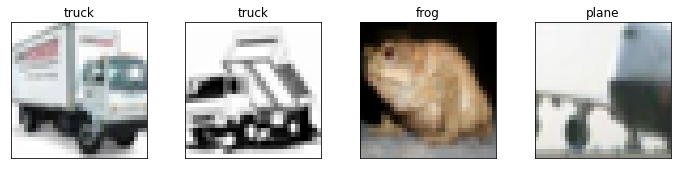

In [6]:
# additional 
import matplotlib.pyplot as plt
import numpy as np

def convert_to_imshow_format(image):
    # first convert back to [0,1] range from [-1,1] range
    image = image / 2 + 0.5
    image = image.numpy()
    # convert from CHW to HWC
    # from 3x32x32 to 32x32x3
    return image.transpose(1,2,0)

dataiter = iter(trainloader)
images, labels = dataiter.next()

fig, axes = plt.subplots(1, len(images), figsize=(12,2.5))
for idx, image in enumerate(images):
    axes[idx].imshow(convert_to_imshow_format(image))
    axes[idx].set_title(classes[labels[idx]])
    axes[idx].set_xticks([])
    axes[idx].set_yticks([])

In [8]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()

In [9]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [10]:
import os

model_directory_path = 'F:\PARALLEL COMPUTING\BTL'
model_path = model_directory_path + 'cifar-10-cnn-model.pt'

if not os.path.exists(model_directory_path):
    os.makedirs(model_directory_path)

if os.path.isfile(model_path):
    # load trained model parameters from disk
    net.load_state_dict(torch.load(model_path))
    print('Loaded model parameters from disk.')
else:
    for epoch in range(100):  # loop over the dataset multiple times

        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs
            inputs, labels = data

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % 2000 == 1999:    # print every 2000 mini-batches
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 2000))
                running_loss = 0.0
    print('Finished Training.')
    torch.save(net.state_dict(), model_path)
    print('Saved model parameters to disk.')

[1,  2000] loss: 2.220
[1,  4000] loss: 1.925
[1,  6000] loss: 1.713
[1,  8000] loss: 1.597
[1, 10000] loss: 1.539
[1, 12000] loss: 1.467
[2,  2000] loss: 1.397
[2,  4000] loss: 1.383
[2,  6000] loss: 1.347
[2,  8000] loss: 1.340
[2, 10000] loss: 1.298
[2, 12000] loss: 1.274
[3,  2000] loss: 1.215
[3,  4000] loss: 1.180
[3,  6000] loss: 1.217
[3,  8000] loss: 1.211
[3, 10000] loss: 1.201
[3, 12000] loss: 1.174
[4,  2000] loss: 1.112
[4,  4000] loss: 1.120
[4,  6000] loss: 1.097
[4,  8000] loss: 1.076
[4, 10000] loss: 1.109
[4, 12000] loss: 1.087
[5,  2000] loss: 1.025
[5,  4000] loss: 1.022
[5,  6000] loss: 1.029
[5,  8000] loss: 1.031
[5, 10000] loss: 1.042
[5, 12000] loss: 1.020
[6,  2000] loss: 0.953
[6,  4000] loss: 0.985
[6,  6000] loss: 0.957
[6,  8000] loss: 0.988
[6, 10000] loss: 0.969
[6, 12000] loss: 0.974
[7,  2000] loss: 0.897
[7,  4000] loss: 0.919
[7,  6000] loss: 0.942
[7,  8000] loss: 0.934
[7, 10000] loss: 0.921
[7, 12000] loss: 0.937
[8,  2000] loss: 0.849
[8,  4000] 

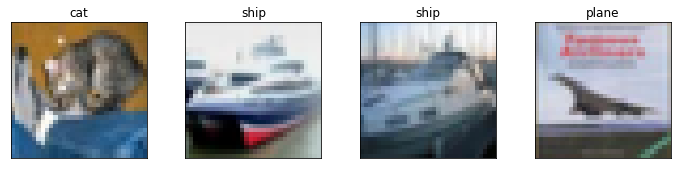

In [11]:
dataiter = iter(testloader)
images, labels = dataiter.next()

fig, axes = plt.subplots(1, len(images), figsize=(12,2.5))
for idx, image in enumerate(images):
    axes[idx].imshow(convert_to_imshow_format(image))
    axes[idx].set_title(classes[labels[idx]])
    axes[idx].set_xticks([])
    axes[idx].set_yticks([])

In [12]:
outputs = net(images)
outputs
sm = nn.Softmax(dim=1)
sm_outputs = sm(outputs)
print(sm_outputs)

tensor([[7.1147e-05, 3.4036e-05, 3.6560e-05, 9.9944e-01, 3.9123e-05, 3.6892e-04,
         3.1759e-06, 1.2948e-06, 1.9622e-06, 1.4183e-06],
        [4.5545e-03, 8.0497e-02, 4.7545e-07, 3.8702e-11, 2.2300e-09, 3.4999e-13,
         4.5392e-11, 9.1158e-14, 9.1495e-01, 2.5186e-06],
        [1.6076e-01, 7.0625e-02, 8.0156e-04, 4.2367e-04, 1.7909e-04, 1.9410e-05,
         1.0215e-04, 1.9198e-05, 7.1993e-01, 4.7135e-02],
        [9.9990e-01, 1.3707e-05, 3.6259e-06, 6.0674e-12, 3.9094e-09, 1.5149e-12,
         1.6811e-11, 1.1684e-10, 8.3126e-05, 2.2420e-07]],
       grad_fn=<SoftmaxBackward>)


In [13]:
probs, index = torch.max(sm_outputs, dim=1)
for p, i in zip(probs, index):
    print('{0} - {1:.4f}'.format(classes[i], p))

cat - 0.9994
ship - 0.9149
ship - 0.7199
plane - 0.9999


In [14]:
total_correct = 0
total_images = 0
confusion_matrix = np.zeros([10,10], int)
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total_images += labels.size(0)
        total_correct += (predicted == labels).sum().item()
        for i, l in enumerate(labels):
            confusion_matrix[l.item(), predicted[i].item()] += 1 

model_accuracy = total_correct / total_images * 100
print('Model accuracy on {0} test images: {1:.2f}%'.format(total_images, model_accuracy))

Model accuracy on 10000 test images: 57.32%


In [16]:
print('{0:10s} - {1}'.format('Category','Accuracy'))
for i, r in enumerate(confusion_matrix):
    print('{0:10s} - {1:.1f}'.format(classes[i], r[i]/np.sum(r)*100))

Category   - Accuracy
plane      - 61.1
car        - 66.6
bird       - 41.8
cat        - 41.9
deer       - 50.4
dog        - 43.5
frog       - 68.4
horse      - 59.9
ship       - 73.2
truck      - 66.4


In [17]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 6854913243305907773, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 9155807527007205320
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 1391547657368447888
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 13980498688
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 16249706852477396865
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [1]:
!nvidia-smi

Tue Jun 23 23:27:41 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------